In [3]:
dir = 'D:/projects/datascience/bfu-ml-labs/lab_7'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
g_random_state = 123

# Часть 1. Регрессия.

In [20]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(f'{dir}/housing.csv', delimiter='\s+', names=col_names)

X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=g_random_state, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [22]:
from sklearn.preprocessing import StandardScaler

# Нейросети очень чувствительны к масштабу данных.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

In [15]:
from sklearn.model_selection import validation_curve


def experiment_with_model_hyperparameter(metric, model, param_name, param_range):
    param_range_str = [str(x) for x in param_range]

    train_scores, test_scores = validation_curve(
        model,
        X_scaled,
        y,
        param_name=param_name,
        param_range=param_range,
        cv=5,
        scoring=metric,
    )

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_std = test_scores.std(axis=1)

    print(test_scores.max())

    plt.figure(figsize=(10, 5))

    plt.plot(param_range_str, train_scores_mean, label='Train')
    plt.plot(param_range_str, test_scores_mean, label='Test')
    plt.fill_between(range(len(param_range_str)), train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.25)
    plt.fill_between(range(len(param_range_str)), test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.25)

    plt.xticks(param_range_str, rotation=90)
    #plt.yticks(np.arange(0., 1., 0.05))
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.legend()
    plt.show()

In [16]:
from sklearn.neural_network import MLPRegressor

In [17]:
layer_configurations = [n_layers * (n_neurons,) for n_neurons in np.arange(5, 20, 5) for n_layers in np.arange(1, 5, 1)]
layer_configurations

[(5,),
 (5, 5),
 (5, 5, 5),
 (5, 5, 5, 5),
 (10,),
 (10, 10),
 (10, 10, 10),
 (10, 10, 10, 10),
 (15,),
 (15, 15),
 (15, 15, 15),
 (15, 15, 15, 15)]

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic 

0.8345092792041859


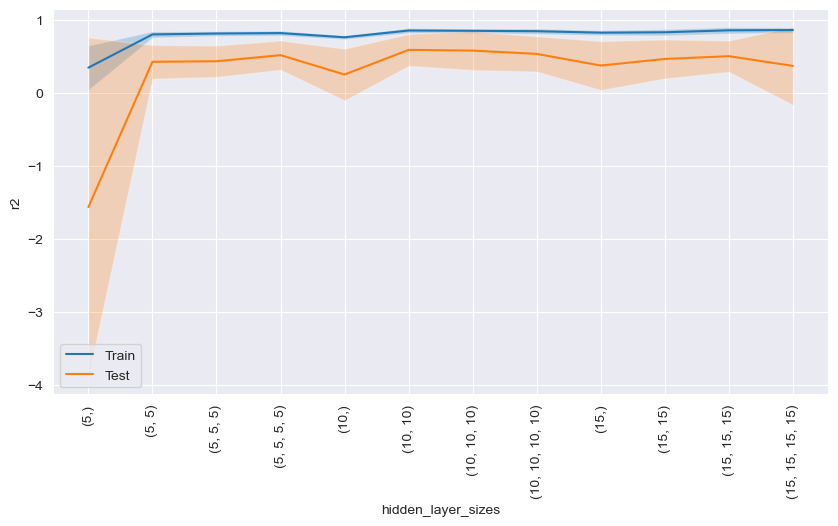

In [18]:
experiment_with_model_hyperparameter(
    'r2',
    MLPRegressor(random_state=g_random_state, max_iter=1000),
    'hidden_layer_sizes',
    layer_configurations
)

0.835216345888086


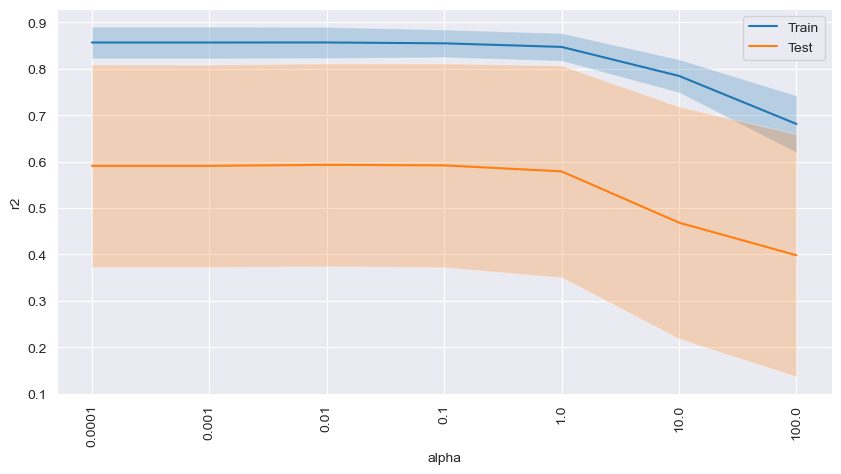

In [21]:
experiment_with_model_hyperparameter(
    'r2',
    MLPRegressor(random_state=g_random_state, max_iter=1000, hidden_layer_sizes=(10, 10)),
    'alpha',
    [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]
)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic 

0.8771422753963404


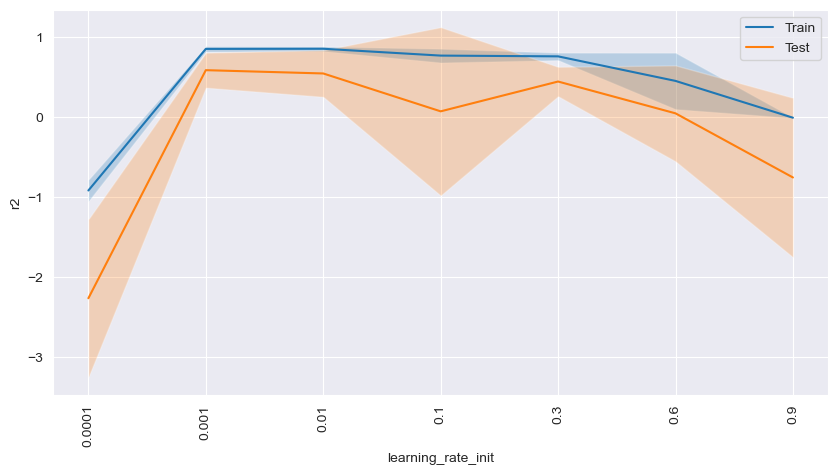

In [23]:
experiment_with_model_hyperparameter(
    'r2',
    MLPRegressor(random_state=g_random_state, max_iter=1000, hidden_layer_sizes=(10, 10), alpha=0.0001),
    'learning_rate_init',
    [0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 0.9]
)

0.8345092792041859


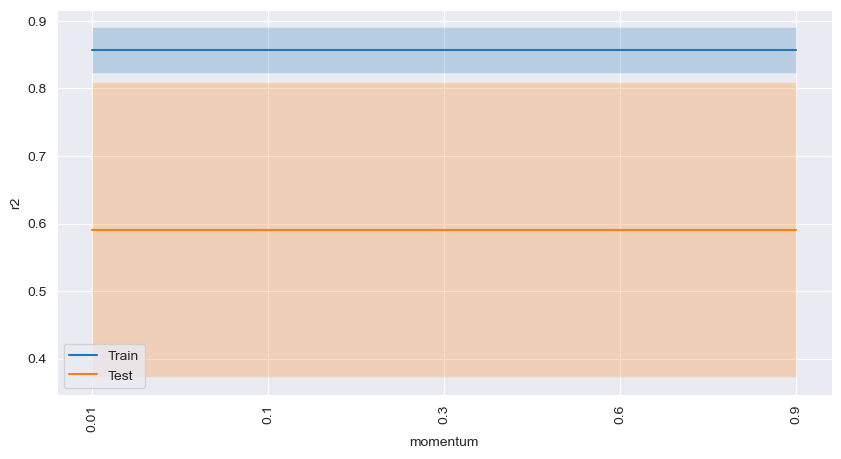

In [24]:
experiment_with_model_hyperparameter(
    'r2',
    MLPRegressor(random_state=g_random_state, max_iter=1000, hidden_layer_sizes=(10, 10), alpha=0.0001, learning_rate_init=0.001),
    'momentum',
    [0.01, 0.1, 0.3, 0.6, 0.9]
)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8390769765695423


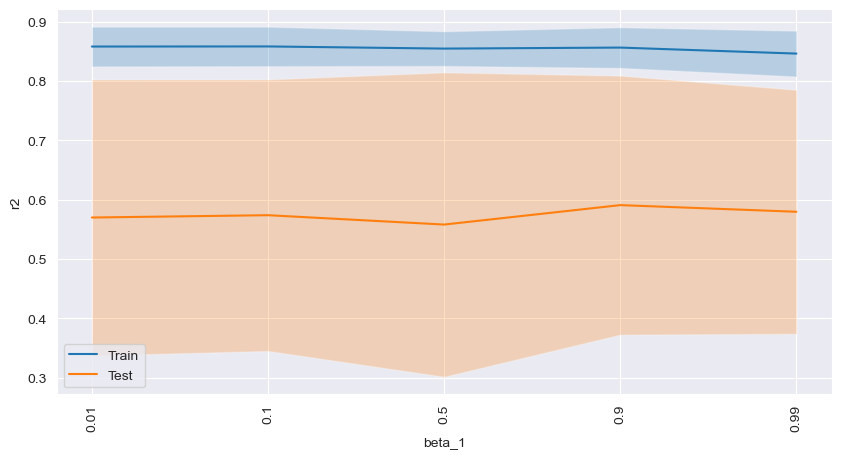

In [26]:
experiment_with_model_hyperparameter(
    'r2',
    MLPRegressor(random_state=g_random_state, max_iter=1000, hidden_layer_sizes=(10, 10), alpha=0.0001),
    'beta_1',
    [0.01, 0.1, 0.5, 0.9, 0.99]
)

0.8708300316169147


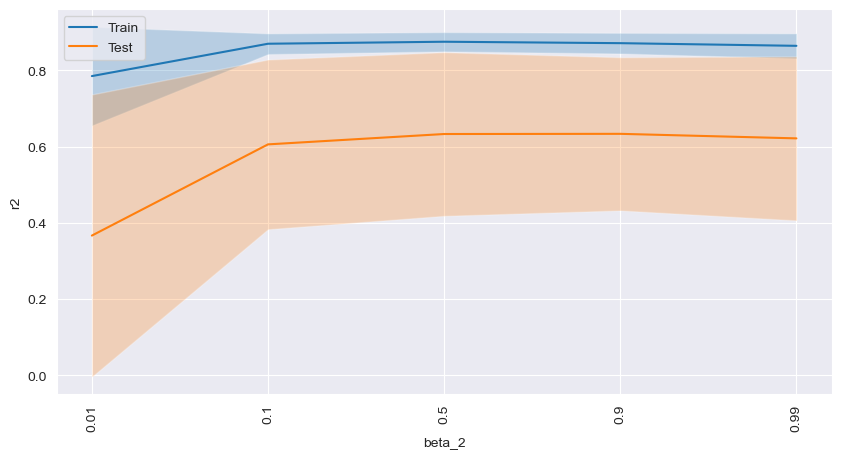

In [27]:
experiment_with_model_hyperparameter(
    'r2',
    MLPRegressor(random_state=g_random_state, max_iter=1000, hidden_layer_sizes=(10, 10), alpha=0.0001),
    'beta_2',
    [0.01, 0.1, 0.5, 0.9, 0.99]
)

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [
        (10,), (100,), (500,),
        (10, 5), (32, 16), (20, 5), (20, 10), (100, 50),
        (100, 50, 10), (200, 100, 50)
    ],
}

grid_search = GridSearchCV(MLPRegressor(random_state=g_random_state, max_iter=5000), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'hidden_layer_sizes': (100, 50, 10)}
0.796595258817605


### Важность гиперпараметров

Модель с одним скрытым слоем работает довольно плохо, особенно при маленьком количестве нейронов. Но при многократном увеличении числа нейронов она начинает давать неплохие результаты. С другой стороны, модели с небольшим числом нейронов, но несколькими слоями, дают хороший результат быстрее -- необходимости в совсем большом числе слоёв нет (двух-трёх по паре десятков нейронов каждый -- уже достаточно). **(Для данной задачи!)** Стоит отметить, что с увеличением числа скрытых нейронов и слоёв затраты на обучение модели резко возрастают, а также она начинает склоняться к переобучению.

Остальные гиперпараметры нейросети, такие как скорость обучения и параметры регуляризации, в данном случае почти не оказывают влияния на качество. Пусть остаются такими, какими они заданы по умолчанию в sklearn.

### Сравнение точности

Модель получилась заметно точнее всех других, полученных в предыдущих лабораторных работах. R^2 около 0.8 при 5-fold кросс-валидации - уже очень хороший результат. Однако на обучение нужно значительно больше ресурсов. Кроме того, нейросеть, построенная здесь, уже далеок не такая понятная и объяснимая, как изученные ранее модели вроде линейной регрессии или дерева решений (тут уже почти что "чёрный ящик").

# Часть 2. Классификация.

In [37]:
from sklearn.datasets import load_digits

digits = load_digits(as_frame=True)
df = digits.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [38]:
df.head()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0        0.0        0.0   
1        0.0        0.0       11.0       16.0       10.0        0.0   
2        0.0        0.0        3.0       11.0       16.0        9.0   
3        0.0        7.0       13.0       13.0        9.0        0.0   
4        0.0        0.0        2.0       16.0        4.0        0.0   

   pixel_7_7  target  
0        0.0       0  
1        0.0       1  
2        0.0       2  
3        0.0       3  
4        0.0       4  

[5 rows x 65 columns]

In [39]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [
        (500,), (1000,),
        (500, 200), (1000, 500),
        (500, 200, 100), (1000, 500, 200),
        (1000, 500, 200, 100)
    ],
}

grid_search = GridSearchCV(MLPClassifier(random_state=g_random_state, max_iter=5000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'hidden_layer_sizes': (500,)}
0.9792234613795952


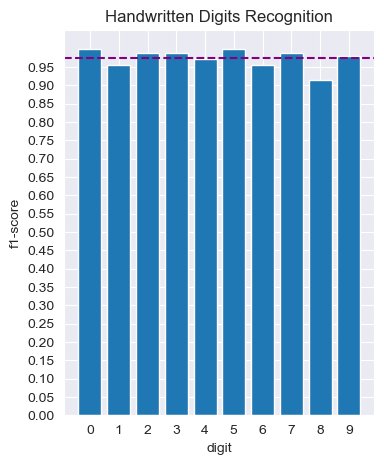

In [62]:
from sklearn.metrics import classification_report

metric = 'f1-score'

report = classification_report(y_test, grid_search.best_estimator_.predict(X_test), output_dict=True)
keys = range(10)
values = [report[str(k)][metric] for k in keys]

plt.figure(figsize=(4, 5))

plt.bar(keys, values)
plt.axhline(np.asarray(values).mean(), c='purple', linestyle='dashed')

plt.xticks(keys)
plt.yticks(np.arange(0., 1., 0.05))
plt.xlabel('digit')
plt.ylabel(metric)
plt.title('Handwritten Digits Recognition')

plt.show()